In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline


# Let's read data
data = pd.read_csv('winequality-white.csv', sep=';')
cols_to_use = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = data[cols_to_use]
Y = data['quality']



In [2]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


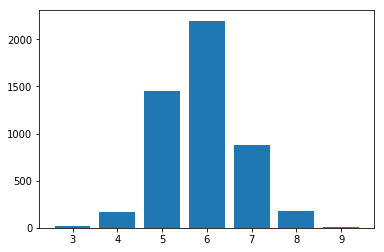

In [3]:
plt.bar(data['quality'].unique(),data['quality'].value_counts())
plt.figure( figsize=[15,6])
plt.show()


In [4]:
# Let's check if t here are any null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

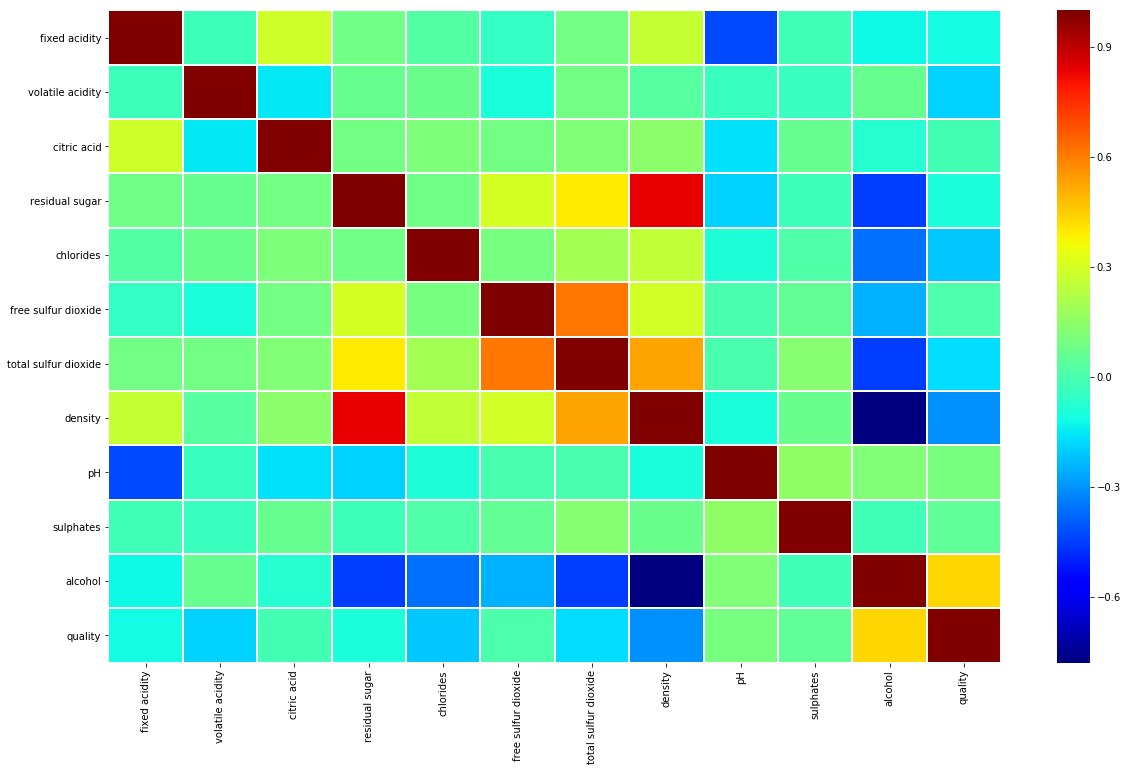

In [5]:
import seaborn as sns
# Import värikartta
import matplotlib.cm as cm

# korrelaatio
korrelaatiot = data.corr()

# Värikartta
cmap = cm.get_cmap('jet')

# Kaavion koko
fig, ax = plt.subplots(figsize=(20,12))

# Luodaan heatmap 'korrelaatiot' -taulusta
sns.heatmap(korrelaatiot,linewidths = 1, cmap=cmap)

In [25]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, train_size=0.9)


from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
#bagg = bagg.fit(X_train, Y_train)
#preds = bagg.predict(X_val)

model = ExtraTreesClassifier(n_estimators = 100, max_depth = None, min_samples_split = 2, random_state = 0)
#model = RandomForestClassifier()
model = model.fit(X_train, Y_train)
preds = model.predict(X_val)

/home/teemu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
model.score(X_val, Y_val)

0.6918367346938775

In [27]:
from sklearn.metrics import accuracy_score

print("Accuracy for model %.2f" % (accuracy_score(Y_val, preds) * 100))

Accuracy for model 69.18


In [30]:
import xgboost as xgb
xgmodel = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
xgmodel = xgmodel.fit(X_train, Y_train)
xgpreds = xgmodel.predict(X_val)

/home/teemu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [31]:
print("Accuracy for xgmodel %.2f" % (accuracy_score(Y_val, xgpreds) * 100))

Accuracy for xgmodel 67.35
